# APPLE QUALITY


This dataset contains information about various attributes of a set of fruits, providing insights into their characteristics. The dataset includes details such as fruit ID, size, weight, sweetness, crunchiness, juiciness, ripeness, acidity, and quality.




## Popular classification algorithm
### Logistic regression
Logistic regression is a calculation used to predict a binary outcome: either something happens, or does not. This can be exhibited as Yes/No, Pass/Fail, Alive/Dead, etc.Independent variables are analyzed to determine the binary outcome with the results falling into one of two categories. The independent variables can be categorical or numeric, but the dependent variable is always categorical
### Naive Bayes
Naive Bayes calculates the possibility of whether a data point belongs within a certain category or does not.
### K-nearest Neighbors
K-nearest neighbors (k-NN) is a pattern recognition algorithm that uses training datasets to find the k closest relatives in future examples. 

When k-NN is used in classification, you calculate to place data within the category of its nearest neighbor. If k = 1, then it would be placed in the class nearest 1. K is classified by a plurality poll of its neighbors.
### Decision Tree
A decision tree is a supervised learning algorithm that is perfect for classification problems, as it’s able to order classes on a precise level. It works like a flow chart, separating data points into two similar categories at a time from the “tree trunk” to “branches,” to “leaves,” where the categories become more finitely similar.

In [45]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: seaborn in c:\users\mpaki\onedrive\python_projects\data_science_training\training_jupyter\lib\site-packages (0.13.1)




[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [46]:
pip install scikit_learn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,accuracy_score

In [48]:
data=pd.read_csv('C:\\Users\\MPAki\\OneDrive\\Python_projects\\Apple quality\Data\\apple_quality.csv')

In [49]:
data.head()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity,Quality
0,0.0,-3.970049,-2.512336,5.346330,-1.012009,1.844900,0.329840,-0.491590483,good
1,1.0,-1.195217,-2.839257,3.664059,1.588232,0.853286,0.867530,-0.722809367,good
2,2.0,-0.292024,-1.351282,-1.738429,-0.342616,2.838636,-0.038033,2.621636473,bad
3,3.0,-0.657196,-2.271627,1.324874,-0.097875,3.637970,-3.413761,0.790723217,good
4,4.0,1.364217,-1.296612,-0.384658,-0.553006,3.030874,-1.303849,0.501984036,good


In [50]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4001 non-null   object 
 8   Quality      4000 non-null   object 
dtypes: float64(7), object(2)
memory usage: 281.4+ KB


In [51]:
# Assuming 'Qualitry' is your target variable
X= data.drop('Quality',axis=1) # Features
y = data['Quality'] #vTarget variable

In [52]:
# convert specific columns to numeric
columns_to_convert =['Acidity']
X[columns_to_convert]=X[columns_to_convert].apply(pd.to_numeric, errors='coerce')

In [53]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4001 entries, 0 to 4000
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   A_id         4000 non-null   float64
 1   Size         4000 non-null   float64
 2   Weight       4000 non-null   float64
 3   Sweetness    4000 non-null   float64
 4   Crunchiness  4000 non-null   float64
 5   Juiciness    4000 non-null   float64
 6   Ripeness     4000 non-null   float64
 7   Acidity      4000 non-null   float64
dtypes: float64(8)
memory usage: 250.2 KB


In [54]:
y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 4001 entries, 0 to 4000
Series name: Quality
Non-Null Count  Dtype 
--------------  ----- 
4000 non-null   object
dtypes: object(1)
memory usage: 31.4+ KB


In [55]:
null_values =X.isnull().sum()
print(null_values)

A_id           1
Size           1
Weight         1
Sweetness      1
Crunchiness    1
Juiciness      1
Ripeness       1
Acidity        1
dtype: int64


In [56]:
X= X.dropna()
y= y.dropna()

## Exploratory Data Analysis

 #### summary statistics.
 mean measures central tendency of the data.and std measures amount of variation from the mean.it quantifies how spread  out the values are from the mean.A close standard deviation indicates that the values tend to be close to the mean,while a high range indicates that the values are spread out over a wide range.


In [57]:
X.describe()

,A_id,Size,Weight,Sweetness,Crunchiness,Juiciness,Ripeness,Acidity
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,1999.500000,-0.503015,-0.989547,-0.470479,0.985478,0.512118,0.498277,0.076877
std,1154.844867,1.928059,1.602507,1.943441,1.402757,1.930286,1.874427,2.110270
min,0.000000,-7.151703,-7.149848,-6.894485,-6.055058,-5.961897,-5.864599,-7.010538
25%,999.750000,-1.816765,-2.011770,-1.738425,0.062764,-0.801286,-0.771677,-1.377424
50%,1999.500000,-0.513703,-0.984736,-0.504758,0.998249,0.534219,0.503445,0.022609
75%,2999.250000,0.805526,0.030976,0.801922,1.894234,1.835976,1.766212,1.510493
max,3999.000000,6.406367,5.790714,6.374916,7.619852,7.364403,7.237837,7.404736


#### Data distribution

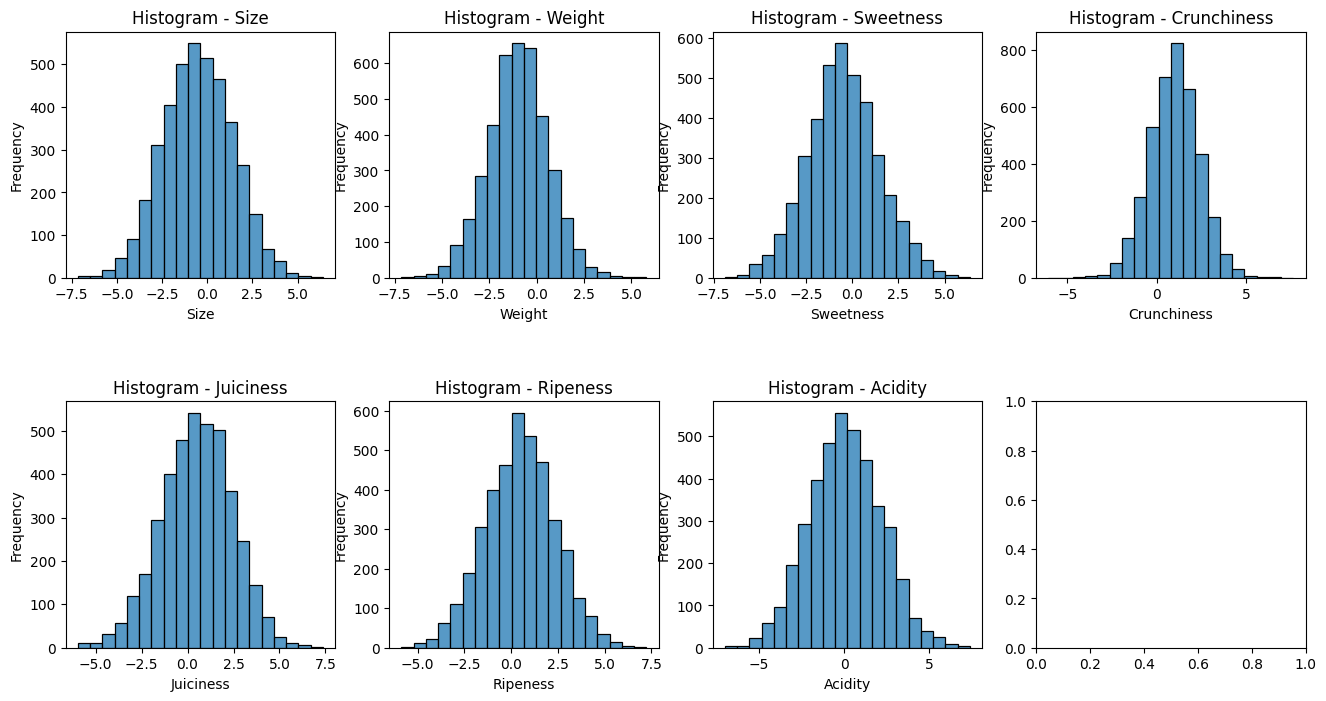

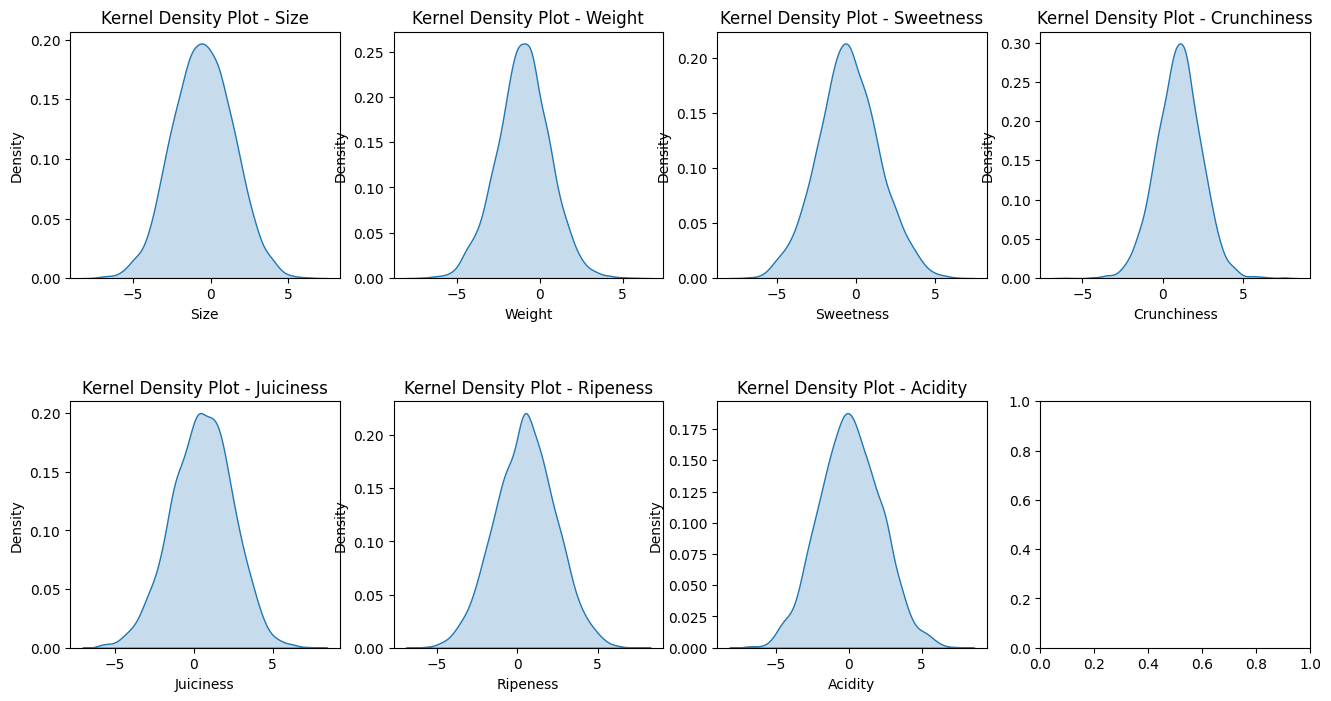

In [58]:

numerical_columns =['Size','Weight','Sweetness','Crunchiness','Juiciness','Ripeness','Acidity']
# Set up subplots for better visualization
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
fig.subplots_adjust(hspace=0.5)
# plot histograms
for i, column in enumerate(numerical_columns):
    row, col = divmod(i, 4)
    sns.histplot(X[column], bins=20, kde=False, ax=axes[row, col])
    axes[row, col].set_title(f'Histogram - {column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Frequency')
# Plot kernel density plots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(16, 8))
fig.subplots_adjust(hspace=0.5)

for i, column in enumerate(numerical_columns):
    row, col = divmod(i, 4)
    sns.kdeplot(X[column], fill=True, ax=axes[row, col])
    axes[row, col].set_title(f'Kernel Density Plot - {column}')
    axes[row, col].set_xlabel(column)
    axes[row, col].set_ylabel('Density')

plt.show()
# from the plots bellow  the distributions are  normal


#### Correlation analysis
Compute the correlation matrix to understand the relationships between different variables.
Visualize the correlations using a heatmap.


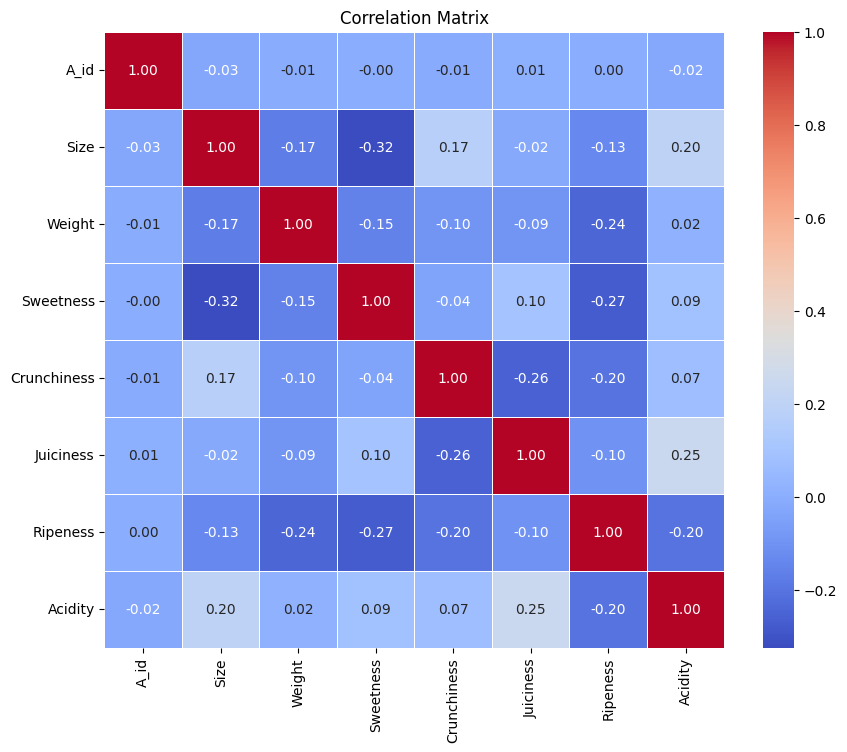

In [59]:
# Calculate the correlation matrix
correlation_matrix =X.corr()
# Create a heatmap to visualize the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()

### Model building

In [60]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [62]:

# Build a  model
models = {'Logistic Regression':LogisticRegression(random_state=42),
       'Random Forest': RandomForestClassifier(random_state=42),
       'Naive Bayes': GaussianNB(),
       'K-Nearest Neighbors': KNeighborsClassifier(),
       'Decision Tree': DecisionTreeClassifier(random_state=42)
}

In [63]:
# Train the model
for name, model in models.items():
    print(f"Training and evaluating {name} model:")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    print(f"Accuracy: {accuracy:.4f}")
    print("Classification Report:\n", report)
    print("="*50)

Training and evaluating Logistic Regression model:
Accuracy: 0.7538
Classification Report:
               precision    recall  f1-score   support

         bad       0.76      0.75      0.75       401
        good       0.75      0.75      0.75       399

    accuracy                           0.75       800
   macro avg       0.75      0.75      0.75       800
weighted avg       0.75      0.75      0.75       800

Training and evaluating Random Forest model:
Accuracy: 0.8925
Classification Report:
               precision    recall  f1-score   support

         bad       0.89      0.89      0.89       401
        good       0.89      0.89      0.89       399

    accuracy                           0.89       800
   macro avg       0.89      0.89      0.89       800
weighted avg       0.89      0.89      0.89       800

Training and evaluating Naive Bayes model:
Accuracy: 0.7650
Classification Report:
               precision    recall  f1-score   support

         bad       0.76      

 From the models above,random forest classifier and K-nearest neighbor have better scores compaired to the other models with 0.89 and 0.86 accuracy score respectively.

### Optimizing performance of the models

In [71]:
# Hyperparameter tuning

param_grid_rf = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

param_grid_knn = {
    'n_neighbors': [3, 5, 7],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

for name, model in models.items():
    print(f"Tuning hyperparameters for {name}")
    if name == 'Random Forest':
        grid_search = GridSearchCV(model, param_grid_rf, cv=5, scoring='accuracy')
    elif name == 'K-Nearest Neighbors':
        grid_search = GridSearchCV(model, param_grid_knn, cv=5, scoring='accuracy')

        grid_search.fit(X_train_scaled, y_train)
    
        best_params = grid_search.best_params_
        print(f"Best hyperparameters: {best_params}")
    
    # Train the model with the best hyperparameters
        best_model = grid_search.best_estimator_
        best_model.fit(X_train_scaled, y_train)
    
    # Make predictions on the test set
        y_pred = best_model.predict(X_test_scaled)
    
    # Evaluate the model
        accuracy = accuracy_score(y_test, y_pred)
        report = classification_report(y_test, y_pred)
        print(f"Accuracy: {accuracy:.4f}")
        print("Classification Report:\n", report)
        print("="*50)

Tuning hyperparameters for Logistic Regression
Tuning hyperparameters for Random Forest
Tuning hyperparameters for Naive Bayes
Tuning hyperparameters for K-Nearest Neighbors
Best hyperparameters: {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'distance'}
Accuracy: 0.8900
Classification Report:
               precision    recall  f1-score   support

         bad       0.88      0.90      0.89       401
        good       0.90      0.88      0.89       399

    accuracy                           0.89       800
   macro avg       0.89      0.89      0.89       800
weighted avg       0.89      0.89      0.89       800

Tuning hyperparameters for Decision Tree
